In [1]:
import time
start = time.perf_counter()

In [15]:
import time
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.random_projection import GaussianRandomProjection
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.manifold import Isomap

In [3]:
np.random.seed(903967645)

In [4]:
default_payment_dataset = pd.read_csv('../data/default_of_credit_card_clients.csv', header=1)
print(default_payment_dataset.info())
default_payment_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Check shape of dataset and for null data
print(default_payment_dataset.shape)
default_payment_dataset.isna().any().any()
print(default_payment_dataset.columns)

(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [7]:
%%time

default_payment_dataset = default_payment_dataset.sample(frac=0.05, random_state=42)

# Separate features and target
train_X = default_payment_dataset.drop(columns=['ID', 'default payment next month'])
train_y = default_payment_dataset['default payment next month']

# Normalize the feature data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(train_X)

# Convert back to DataFrame
train_X = pd.DataFrame(X_scaled, columns=train_X.columns)

CPU times: user 5.03 ms, sys: 2.68 ms, total: 7.71 ms
Wall time: 5.75 ms


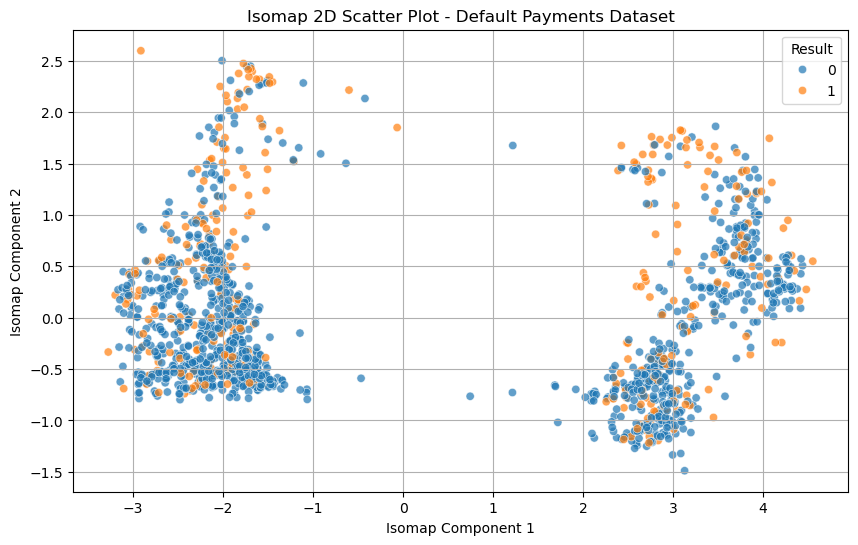

CPU times: user 11.3 s, sys: 7.83 s, total: 19.1 s
Wall time: 2.43 s


In [10]:
%%time
# Initialize Isomap with desired number of components
n_components = 2
isomap = Isomap(n_components=n_components, n_neighbors=5)

# Fit and transform the data
isomap_result = isomap.fit_transform(train_X)

# Create a DataFrame for the result
isomap_df = pd.DataFrame(isomap_result, columns=[f'Isomap-{i}' for i in range(n_components)])
isomap_df['Result'] = train_y.values

# Plotting the first two Isomap components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Isomap-0', y='Isomap-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=isomap_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap 2D Scatter Plot (Default Payments')
plt.savefig('../images/isomap-defaults-2d.png')
plt.grid(True)
plt.show()

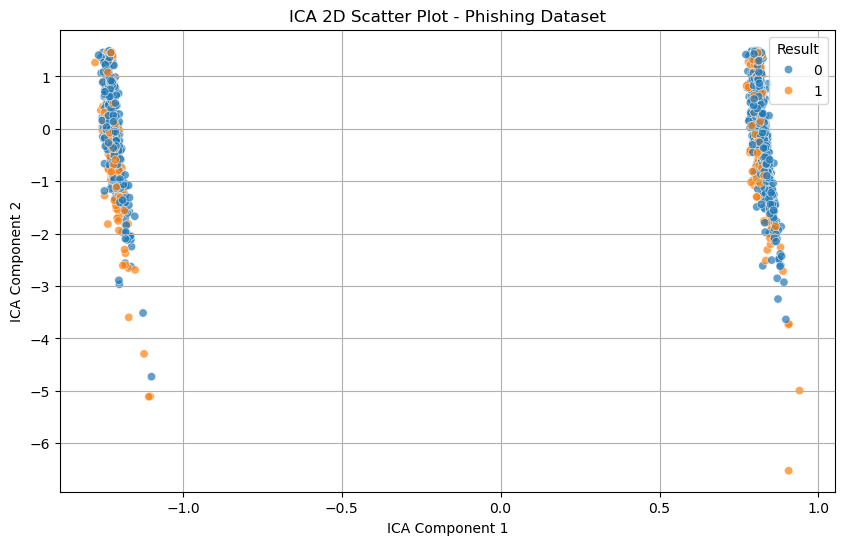

In [11]:
# Initialize ICA
ica = FastICA(n_components=n_components, random_state=42)

# Fit and transform the data
ica_result = ica.fit_transform(train_X)

# Create a DataFrame for the result
ica_df = pd.DataFrame(ica_result, columns=[f'ICA-{i}' for i in range(n_components)])
ica_df['Result'] = train_y.values

# Plotting ICA result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ICA-0', y='ICA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=ica_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('ICA 2D Scatter Plot - Phishing Dataset')
plt.savefig('../images/isomap-ica-defaults-2d.png')
plt.grid(True)
plt.show()

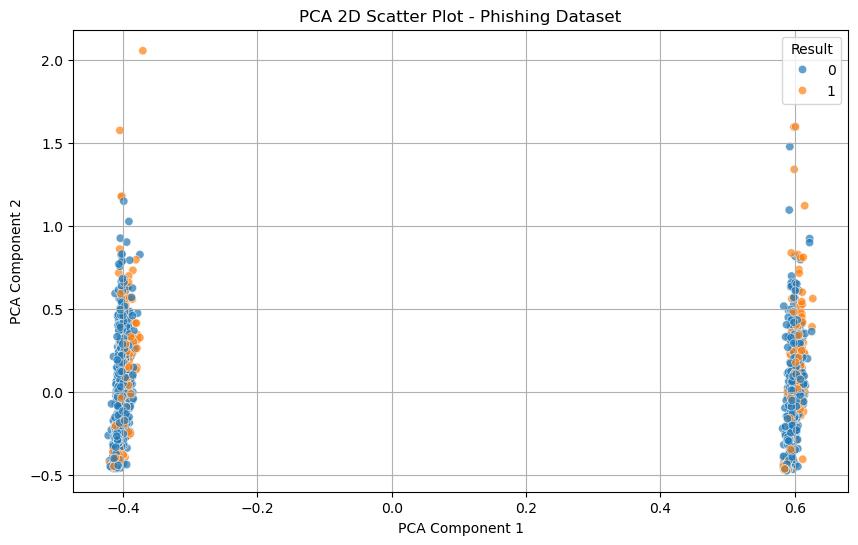

In [12]:
# Example: PCA for comparison
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_X)

pca_df = pd.DataFrame(pca_result, columns=[f'PCA-{i}' for i in range(2)])
pca_df['Result'] = train_y.values

# Plotting PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA-0', y='PCA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=pca_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA 2D Scatter Plot - Phishing Dataset')
plt.savefig('../images/isomap-pca-defaults-2d.png')
plt.grid(True)
plt.show()

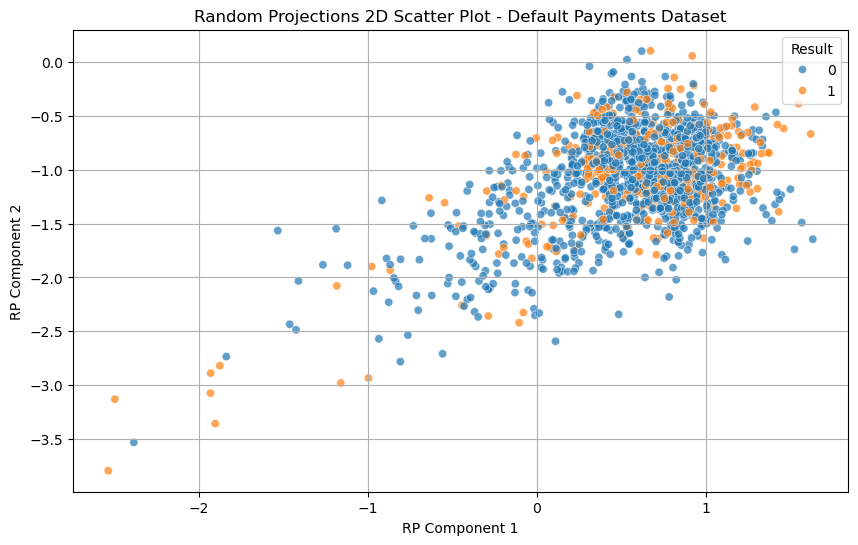

In [18]:
# Initialize Random Projections
rp = GaussianRandomProjection(n_components=n_components, random_state=42)

# Fit and transform the data
rp_result = rp.fit_transform(train_X)

# Create a DataFrame for the result
rp_df = pd.DataFrame(rp_result, columns=[f'RP-{i}' for i in range(n_components)])
rp_df['Result'] = train_y.values

# Plotting Random Projections result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='RP-0', y='RP-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=rp_df,
    legend='full',
    alpha=0.7
)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('Random Projections 2D Scatter Plot - Default Payments Dataset')
plt.savefig('../images/isomap-random-projections-defaults.png')
plt.grid(True)
plt.show()

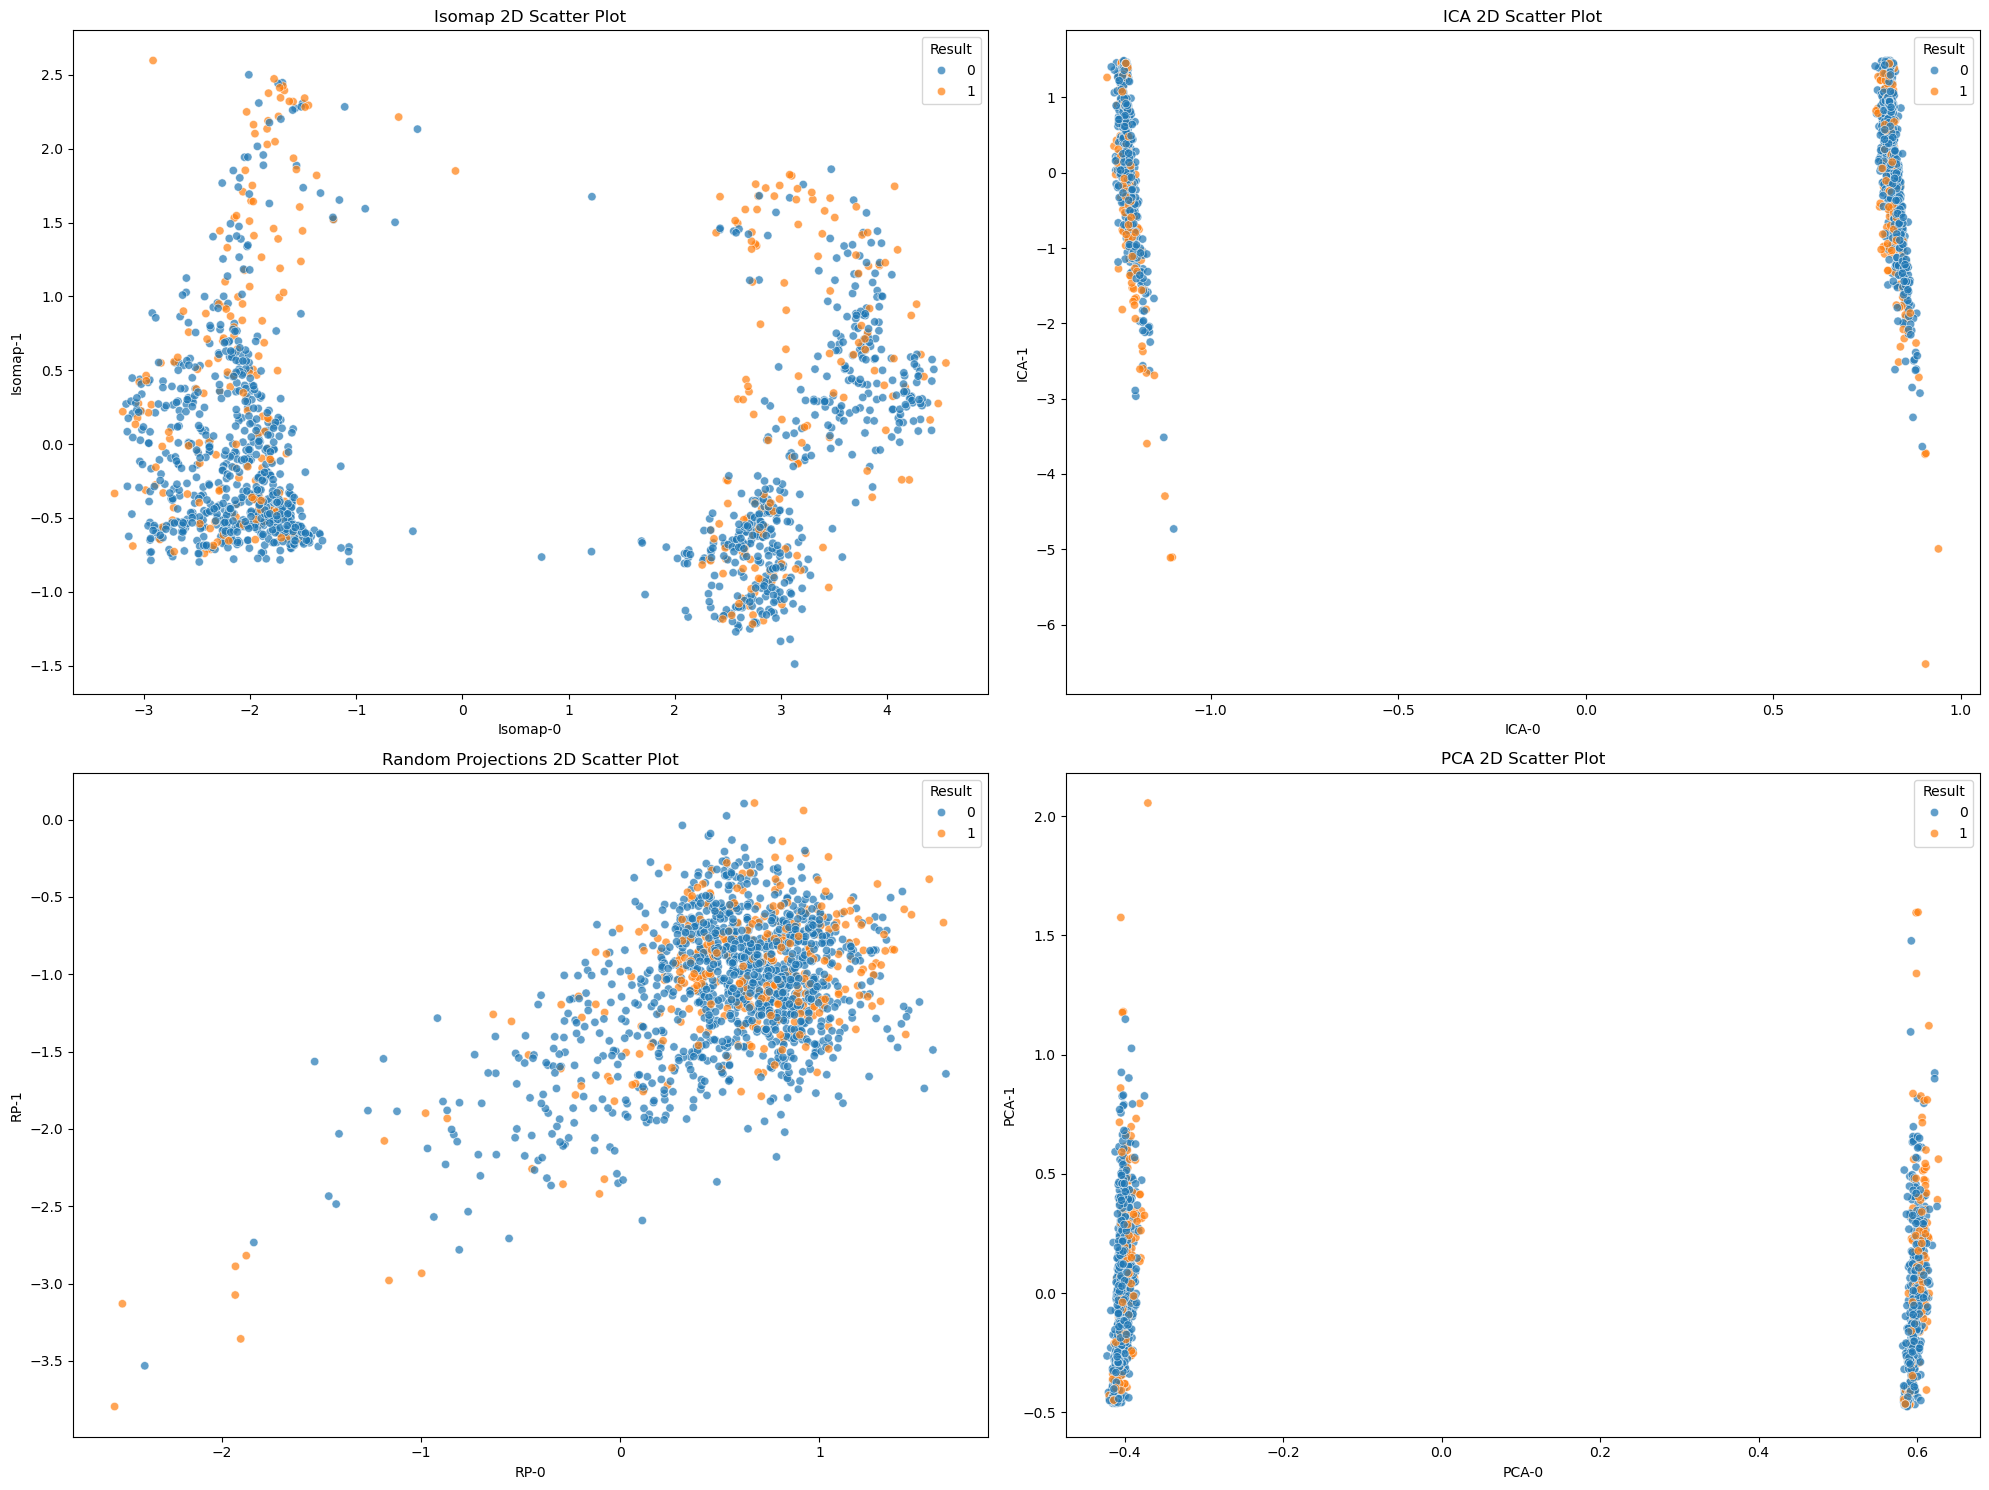

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Isomap Plot
sns.scatterplot(
    x='Isomap-0', y='Isomap-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=isomap_df,
    legend='full',
    alpha=0.7,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Isomap 2D Scatter Plot (Default Payments)')

# ICA Plot
sns.scatterplot(
    x='ICA-0', y='ICA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=ica_df,
    legend='full',
    alpha=0.7,
    ax=axes[0, 1]
)
axes[0, 1].set_title('ICA 2D Scatter Plot (Default Payments)')

# Random Projections Plot
sns.scatterplot(
    x='RP-0', y='RP-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=rp_df,
    legend='full',
    alpha=0.7,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Random Projections 2D Scatter Plot (Default Payments)')

# PCA Plot (for reference)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_X)
pca_df = pd.DataFrame(pca_result, columns=[f'PCA-{i}' for i in range(2)])
pca_df['Result'] = train_y.values

sns.scatterplot(
    x='PCA-0', y='PCA-1',
    hue='Result',
    palette=sns.color_palette('tab10', len(train_y.unique())),
    data=pca_df,
    legend='full',
    alpha=0.7,
    ax=axes[1, 1]
)
axes[1, 1].set_title('PCA 2D Scatter Plot (Default Payments)')

plt.tight_layout()
plt.savefig('../images/isomap-all-plots-defaults.png')
plt.show()

In [ ]:
end = time.perf_counter()
print("Time taken: in min", (end - start)/60)